In [1]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.


import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp

%config Completer.use_jedi = False



In [2]:
import numpy as np
import json
import pickle
import pandas as pd
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False




# Are fully algortihmic markets more collusive than fully human markets?

To answer this question we will compare the outcomes for the algorithmic market to the outcomes in the last super game of the human markets. We focus on the last super game as this allowed humans for some learning. Arguably this is the most accurate comparision.

First we load the needed data.

In [3]:
# Two firm algorithm markets
with open(ppj("OUT_DATA", f"grid_2_agents.pickle"), "rb") as f:
    all_output_grids_2_agents = pickle.load(f)
all_prices_2_agents_grid = np.array(all_output_grids_2_agents['avg_price'])
with open(ppj("OUT_DATA", "super_star_avg_prices_2_agents.pickle"), "rb") as f:
    super_star_avg_prices_2_agents = pickle.load(f)

# Three firm algorithm markets
with open(ppj("OUT_DATA", f"grid_3_agents.pickle"), "rb") as f:
    all_output_grids_3_agents = pickle.load(f)
all_prices_3_agents_grid = np.array(all_output_grids_3_agents['avg_price'])
with open(ppj("OUT_DATA", "super_star_avg_prices_3_agents.pickle"), "rb") as f:
    super_star_avg_prices_3_agents = pickle.load(f)


In [4]:
# we want to transform those to pandas dataframes as it will be easier to deal with them once we go over to plotting

In [5]:
with open(ppj("OUT_DATA", "data_group_level.pickle"), "rb") as f:
    data_group_level = pickle.load(f)

## Next up we use mann whitney u tests to compare the respective samples.

In [6]:
from scipy.stats import mannwhitneyu, ttest_1samp, ttest_ind

### We start by comparing the market prices within a respective market size.

Two firm market:

In [7]:
print("Two firm market. Algo (super star) v human ")
for sg in range(1,4):
    subset_sg = data_group_level.loc[(data_group_level['super_game'] == sg) & 
                                                        (data_group_level['treatment'] == '2H0A')].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()

    p_value = mannwhitneyu(
        subset_sg['winning_price'],
        super_star_avg_prices_2_agents,
        use_continuity=False,
        alternative='two-sided'
    )[-1]
    print(f"Super game: {sg}. P-value: {p_value:.3f}")

Two firm market. Algo (super star) v human 
Super game: 1. P-value: 0.000
Super game: 2. P-value: 0.000
Super game: 3. P-value: 0.000


In [8]:
print("Two firm market. Algo (grid average) v human ")
for sg in range(1,4):
    subset_sg = data_group_level.loc[(data_group_level['super_game'] == sg) & 
                                      (data_group_level['treatment'] == '2H0A')].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()

    p_value = ttest_1samp(
        subset_sg['winning_price'],
        all_prices_2_agents_grid.mean(),
        alternative='two-sided'
    )[-1]
    print(f"Super game: {sg}. P-value: {p_value:.3f}")

Two firm market. Algo (grid average) v human 
Super game: 1. P-value: 0.000
Super game: 2. P-value: 0.005
Super game: 3. P-value: 0.034


In [9]:
print(f"Average price of the grid in two firm markets: {all_prices_2_agents_grid.mean():.3f}")

Average price of the grid in two firm markets: 3.511


Three firm market:


In [10]:
print("Three firm market. Algo (super star) v human ")
for sg in range(1,4):
    subset_sg = data_group_level.loc[(data_group_level['super_game'] == sg) & 
                                     (data_group_level['treatment'] == '3H0A')].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()

    p_value = mannwhitneyu(
        subset_sg['winning_price'],
        super_star_avg_prices_3_agents,
        use_continuity=False,
        alternative='two-sided'
    )[-1]
    print(f"Super game: {sg}. P-value: {p_value:.3f}")

Three firm market. Algo (super star) v human 
Super game: 1. P-value: 0.000
Super game: 2. P-value: 0.008
Super game: 3. P-value: 0.980


In [11]:
print("Two firm market. Algo (grid average) v human ")
for sg in range(1,4):
    subset_sg = data_group_level.loc[(data_group_level['super_game'] == sg) & 
                                      (data_group_level['treatment'] == '3H0A')].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()

    p_value = ttest_1samp(
        subset_sg['winning_price'],
        all_prices_3_agents_grid.mean(),
        alternative='two-sided'
    )[-1]
    print(f"Super game: {sg}. P-value: {p_value:.3f}")

Two firm market. Algo (grid average) v human 
Super game: 1. P-value: 0.991
Super game: 2. P-value: 0.339
Super game: 3. P-value: 0.044


In [12]:
print(f"Average price of the grid in three firm markets: {all_prices_3_agents_grid.mean():.3f}")

Average price of the grid in three firm markets: 1.574


There exist no statistically significant differences between the prices in the three firm markets with the super star algorithms and humans. Interestingly, the average algorithm from the grid search is *less* collusive than the human market with this difference being statistically significant at $p<0.01$.

# Algo v Algo

See Algo analysis q_env.ipynb


# Human v humans


In [13]:
data_humans_first_super_game = data_group_level.loc[(data_group_level['super_game'] == 1) & 
                                                    (data_group_level['treatment'].isin(['3H0A', '2H0A']))].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()
data_humans_second_super_game = data_group_level.loc[(data_group_level['super_game'] == 2) & 
                                                    (data_group_level['treatment'].isin(['3H0A', '2H0A']))].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()
data_humans_third_super_game = data_group_level.loc[(data_group_level['super_game'] == 3) & 
                                                    (data_group_level['treatment'].isin(['3H0A', '2H0A']))].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()


In [14]:
data_humans_all_super_game = data_group_level.loc[
                                                    (data_group_level['treatment'].isin(['3H0A', '2H0A']))].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()


In [15]:
mannwhitneyu(
    data_humans_first_super_game.loc[data_humans_first_super_game['treatment'] == '3H0A']['winning_price'],
    data_humans_first_super_game.loc[data_humans_first_super_game['treatment'] == '2H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.04530386472278079

In [16]:
mannwhitneyu(
    data_humans_second_super_game.loc[data_humans_second_super_game['treatment'] == '3H0A']['winning_price'],
    data_humans_second_super_game.loc[data_humans_second_super_game['treatment'] == '2H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.050961936967763306

In [17]:
mannwhitneyu(
    data_humans_third_super_game.loc[data_humans_third_super_game['treatment'] == '3H0A']['winning_price'],
    data_humans_third_super_game.loc[data_humans_third_super_game['treatment'] == '2H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.28275614744399247

In [18]:
mannwhitneyu(
    data_humans_all_super_game.loc[data_humans_all_super_game['treatment'] == '3H0A']['winning_price'],
    data_humans_all_super_game.loc[data_humans_all_super_game['treatment'] == '2H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.04042397933690852

This shows the importance of learning for humans, which appears to be more pronounce in larger and therefore strategically more complex markets.

# Mixed market analysis

#### Analysis

In [19]:
data_mixed_pooled = data_group_level.loc[(data_group_level['treatment'].isin(['3H0A', '2H0A', '1H1A', '2H1A', '1H2A'])
                                                    )].groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()


2H0A v 1H1A (pooled)

In [20]:
mannwhitneyu(
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '2H0A']['winning_price'],
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '1H1A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'
)[-1]


0.83563115352624

1H1A v 0H2A 

In [21]:
mannwhitneyu(
    super_star_avg_prices_2_agents,
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '1H1A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'
)[-1]


1.8164963552670638e-35

3H0A v 2H1A

In [22]:
mannwhitneyu(
data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '3H0A']['winning_price'],
data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '2H1A']['winning_price'],
use_continuity=False,
alternative='two-sided'

)[-1]


0.06391934147515746

2H1A v 1H2A

In [23]:
mannwhitneyu(
data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '2H1A']['winning_price'],
data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '1H2A']['winning_price'],
use_continuity=False,
alternative='two-sided'

)[-1]


0.005276795014053497

3H0A v 1H2A

In [24]:
mannwhitneyu(
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '3H0A']['winning_price'],
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '1H2A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]


0.17542896105941352

1H2A v 0H3A

In [25]:
mannwhitneyu(
    super_star_avg_prices_3_agents,
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '1H2A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'
)[-1]


0.7564529590700199

In [26]:
mannwhitneyu(
    super_star_avg_prices_3_agents,
    data_mixed_pooled.loc[data_mixed_pooled['treatment'] == '3H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'
)[-1]


0.007433916182532387

# Weird states

There are states that trigger responses by the algorithm that are different from the ones discussed in the paper. Below you see that those can account for only 1% of all rounds.

In [27]:
with open(ppj("OUT_DATA", "data_individual_level.pickle"), "rb") as f:
    data_individual_level = pickle.load(f)

In [28]:
# Share of states where an algo play smth else than 1 or 4
data_algos_group = data_group_level.loc[~data_group_level['treatment'].isin(['2H0A', '3H0A'])].copy()
n_price_not_1_or_4 = data_algos_group.loc[~data_algos_group['price_algorithm'].isin([1,4])] 


In [29]:
data_algos = data_individual_level.loc[~data_individual_level['treatment'].isin(['2H0A', '3H0A'])].copy()

In [30]:
data_algos.loc[(data_algos['price_algorithm'] == 4) & (~data_algos['price_lag_1'].isin([1,4])) & 
               (data_algos['round']>1)]

,participant.code,round,super_game,group_id,winning_price,price,price_algorithm,id_in_group,data_identifier,treatment,...,winning_price_lag_2,price_lag_2,price_algorithm_2,winning_price_lag_3,price_lag_3,price_algorithm_3,winning_price_lag_4,price_lag_4,price_algorithm_4,r_sg
322,4ekr2gwa,2.0,2.0,11,4.0,4.0,4.0,1.0,session_20052021_1200,1H1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
617,dsqoki32,10.0,3.0,6,4.0,4.0,4.0,1.0,session_21052021_1200,1H1A,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,51


In [31]:
data_group_level['treatment'].unique()

array(['2H0A', '1H1A', '3H0A', '2H1A', '1H2A'], dtype=object)

In [32]:
len(data_algos_group.loc[(data_algos_group['price_algorithm'] == 3) & (data_algos_group['treatment'] == '1H2A')]) / len(data_algos_group)

0.010453850076491586

In [33]:
(len(n_price_not_1_or_4) + 2 )/ len(data_algos_group)

0.013003569607343193

# 2H1A

In [88]:
data_2H1A = data_individual_level.loc[(data_individual_level['super_game']==3) & (data_individual_level['treatment']=='2H1A')].copy()

In [81]:
import matplotlib as mpl


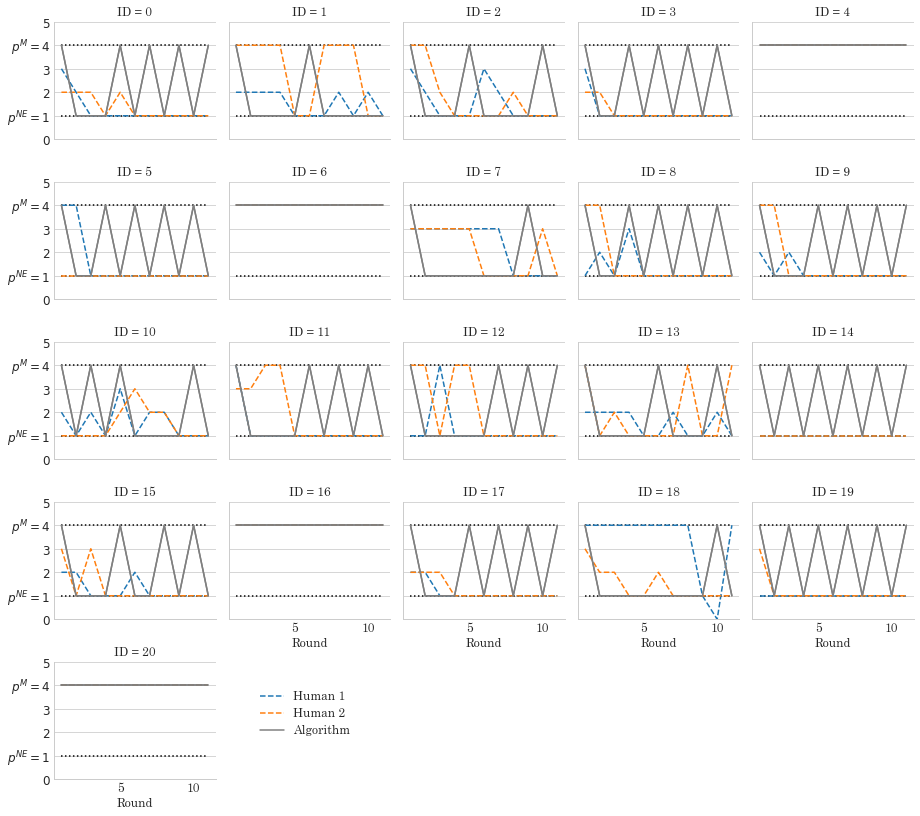

In [94]:
# Some default styling for the plot
plt.style.use('seaborn-whitegrid')
mpl.rc('font', family='serif') 
mpl.rc('font', serif='Century') 
plt.rcParams.update({'font.size': 12,
                    'axes.titlesize': 12})    


data_2H1A['ID'], _ = pd.factorize(data_2H1A['group_id_general'])



g = sns.FacetGrid(data_2H1A, col="ID", hue="id_in_group", col_wrap=5, height=2.3, aspect=1.1, legend_out=True)
g.map(sns.lineplot, "round", "price", linestyle='--')
g.map(sns.lineplot, "round", "price_algorithm", color='grey')

g.set(ylim=(0, 5), yticks=[0, 1, 2, 3,4,5], xticks=[5, 10])
g.set_yticklabels(["$0$", "$p^{NE}=1$", "$2$", "$3$", "$p^{M}=4$", "$5$"])
g.set_xlabels('Round')
g.set_ylabels('')


for i_ax, ax in enumerate(g.axes.flatten()):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.grid(False)
    if i_ax == 0:
        ax.legend(labels=['Human 1', 'Human 2', 'Algorithm'], bbox_to_anchor=(1.9, -4.6))
    ax.hlines(
        1,
        xmax=11,
        xmin=1,
        linestyle='dotted',
        colors='black')
    ax.hlines(
        4,
        xmax=11,
        xmin=1,
        linestyle='dotted',
        colors='black')
